## EV Charging & Registration Analysis

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
from scipy.stats import linregress
import statsmodels.api as sm
import matplotlib.cm as cm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from datetime import datetime
import matplotlib.ticker as ticker
from pandas.plotting import table

# International new EV registrations (2024)

In [157]:
# Data from Statista

worldwide = pd.read_excel(
    "datasets/statistic_id1220664_absatz-von-elektroautos-weltweit-nach-laendern-2024.xlsx"
)

country_translation = {
    "Deutschland": "Germany",
    "Vereinigtes Königreich": "United Kingdom",
    "Frankreich": "France",
    "Kanada": "Canada",
    "Belgien": "Belgium",
    "Niederlande": "Netherlands",
    "Schweden": "Sweden",
    "Südkorea": "South Korea",
    "Norwegen": "Norway",
    "Spanien": "Spain",
    "Italien": "Italy",
    "Dänemark": "Denmark",
    "Schweiz": "Switzerland",
    "Österreich": "Austria",
    "Finnland": "Finland",
    "restliche Welt": "Rest of World",
}
worldwide["Länder"] = (
    worldwide["Länder"].map(country_translation).fillna(worldwide["Länder"])
)

worldwide.head()

,Länder,2023,2024,Einwohner
0,China,9047000,11250000,1425.0
1,USA,1454100,1623200,336.5
2,Germany,699940,572510,83.3
3,United Kingdom,456000,549100,67.9
4,France,491900,464700,68.1


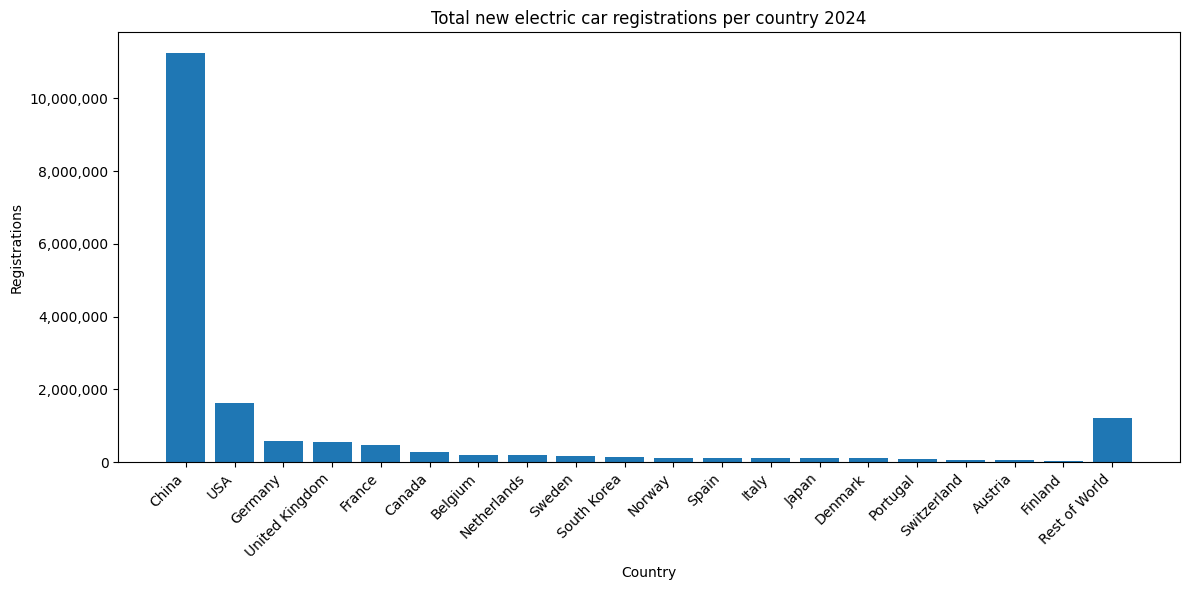

In [158]:
plt.figure(figsize=(12, 6))
plt.bar(worldwide["Länder"], worldwide["2024"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Registrations")
plt.title("Total new electric car registrations per country 2024")
ax = plt.gca()
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
plt.tight_layout()
plt.show()

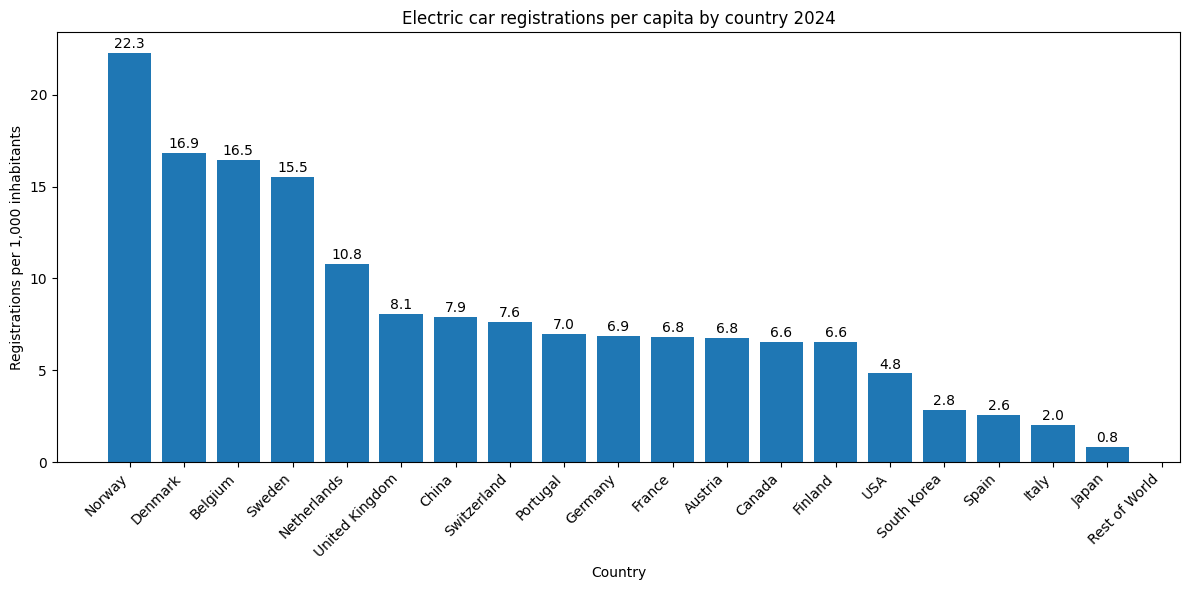

In [159]:
worldwide["registrations_per_1000"] = (
    worldwide["2024"] / (worldwide["Einwohner"] * 1000000)
) * 1000

worldwide_sorted = worldwide.sort_values("registrations_per_1000", ascending=False)

plt.figure(figsize=(12, 6))
bars = plt.bar(worldwide_sorted["Länder"], worldwide_sorted["registrations_per_1000"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Country")
plt.ylabel("Registrations per 1,000 inhabitants")
plt.title("Electric car registrations per capita by country 2024")

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.1,
        f"{height:.1f}",
        ha="center",
        va="bottom",
    )

plt.tight_layout()
plt.show()

# Charging station infrastructure & new registrations in Germany

In [160]:
current_data = {
    "Fahrzeugtyp": [
        "Reine Elektroautos (BEV)",
        "Plug-in Hybride (PHEV)",
        "Gesamt EV + PHEV",
    ],
    "Anzahl_Mio": [1.65, 0.97, 2.62],
    "Anteil_Prozent": [63.0, 37.0, 100.0],
}

charging_points_total = 170000  # 170K Ladepunkte

print("=== Aktuelle EV-Situation in Deutschland (2025) ===")
print(f"Reine Elektroautos (BEV): {current_data['Anzahl_Mio'][0]:.2f} Mio")
print(f"Plug-in Hybride (PHEV): {current_data['Anzahl_Mio'][1]:.2f} Mio")
print(f"Gesamt EV + PHEV: {current_data['Anzahl_Mio'][2]:.2f} Mio")
print(f"Öffentliche Ladepunkte: {charging_points_total:,}")
print()
print("=== Verhältnisse ===")
print(f"EV Anteil: {current_data['Anteil_Prozent'][0]:.1f}%")
print(f"PHEV Anteil: {current_data['Anteil_Prozent'][1]:.1f}%")
print(
    f"Fahrzeuge pro Ladepunkte: {(current_data['Anzahl_Mio'][2] * 1000000) / charging_points_total:.1f}"
)
print(
    f"Ladepunkte pro 1000 Fahrzeuge: {(charging_points_total / (current_data['Anzahl_Mio'][2] * 1000000)) * 1000:.1f}"
)
print()
print("=== EU Empfehlung ===")
print("1 Charging Point for 10 EVs")
print()
print("=== Goal in Germany ===")
print("1 Million Charging Points und 15 Millionen Elektroautos till 2030 - realistic?")
print(
    "Bis 2026 soll mindestens alle 60 Kilometer eine öffentliche Ladepunkte verfügbar sein. - Sind wir da schon?"
)

=== Aktuelle EV-Situation in Deutschland (2025) ===
Reine Elektroautos (BEV): 1.65 Mio
Plug-in Hybride (PHEV): 0.97 Mio
Gesamt EV + PHEV: 2.62 Mio
Öffentliche Ladepunkte: 170,000

=== Verhältnisse ===
EV Anteil: 63.0%
PHEV Anteil: 37.0%
Fahrzeuge pro Ladepunkte: 15.4
Ladepunkte pro 1000 Fahrzeuge: 64.9

=== EU Empfehlung ===
1 Charging Point for 10 EVs

=== Goal in Germany ===
1 Million Charging Points und 15 Millionen Elektroautos till 2030 - realistic?
Bis 2026 soll mindestens alle 60 Kilometer eine öffentliche Ladepunkte verfügbar sein. - Sind wir da schon?


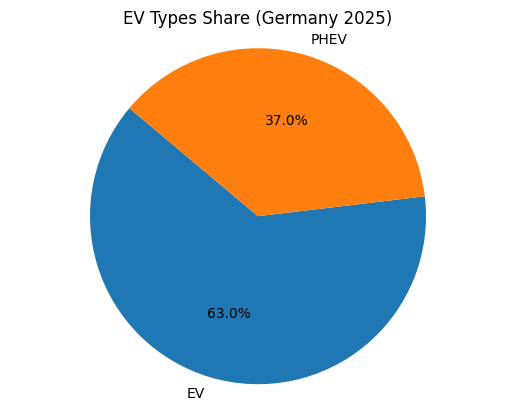

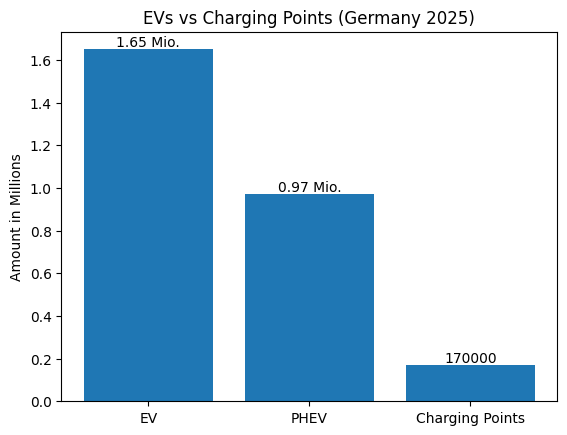

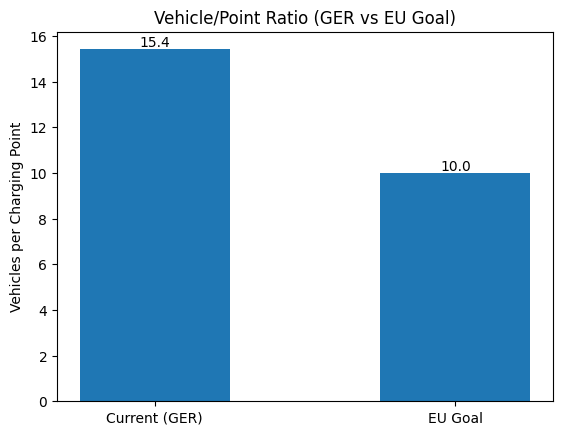

In [161]:
current_data = {
    "Fahrzeugtyp": ["EV", "PHEV", "Total"],
    "Anzahl_Mio": [1.65, 0.97, 2.62],
    "Anteil_Prozent": [63.0, 37.0, 100.0],
}
charging_points_total = 170000
vehicles_per_points = (current_data["Anzahl_Mio"][2] * 1000000) / charging_points_total
eu_recommendation_ratio = 10

plt.figure()
labels = [current_data["Fahrzeugtyp"][0], current_data["Fahrzeugtyp"][1]]
sizes = [current_data["Anteil_Prozent"][0], current_data["Anteil_Prozent"][1]]
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=140)
plt.title("EV Types Share (Germany 2025)")
plt.axis("equal")

plt.figure()
categories = ["EV", "PHEV", "Charging Points"]
values_mio = [
    current_data["Anzahl_Mio"][0],
    current_data["Anzahl_Mio"][1],
    charging_points_total / 1000000,
]
bars = plt.bar(categories, values_mio)

for bar, cat in zip(bars, categories):
    yval = bar.get_height()
    if "Points" in cat:
        label_text = str(charging_points_total)
        unit = ""
    else:
        label_text = str(round(yval, 2))
        unit = " Mio."
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        label_text + unit,
        ha="center",
        va="bottom",
    )

plt.ylabel("Amount in Millions")
plt.title("EVs vs Charging Points (Germany 2025)")

plt.figure()
ratio_categories = ["Current (GER)", "EU Goal"]
ratio_values = [vehicles_per_points, eu_recommendation_ratio]
bars_ratio = plt.bar(ratio_categories, ratio_values, width=0.5)

for bar in bars_ratio:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        str(round(yval, 1)),
        ha="center",
        va="bottom",
    )

plt.ylabel("Vehicles per Charging Point")
plt.title("Vehicle/Point Ratio (GER vs EU Goal)")

plt.show()

In [162]:
# Data from Statista

charging_ger = pd.read_excel(
    "datasets/statistic_id1300745_number-of-new-public-charging-stations-germany-2014-2025.xlsx"
)
charging_ger.head()

,Year,Amount
0,2014,220
1,2015,435
2,2016,1015
3,2017,1783
4,2018,3781


In [163]:
# Data from Statista

newregistration_electric_ger = pd.read_excel(
    "datasets/statistic_id1166572_new-electric-car-registrations-in-germany-2003-2024.xlsx"
)
newregistration_electric_ger.head()

,Year,Amount
0,2003,28
1,2004,61
2,2005,47
3,2006,19
4,2007,8


In [164]:
# Data from Statista

newregistration_hybrid_ger = pd.read_excel(
    "datasets/statistic_id1241597_pkw-neuzulassungen-mit-plug-in-hybrid-antrieb-in-deutschland-bis-september-2025.xlsx"
)
newregistration_hybrid_ger.head()

,Unnamed: 0,Year,Amount
0,NaN,2013¹,1385
1,NaN,2014¹,4527
2,NaN,2015¹,11101
3,NaN,2016,13744
4,NaN,2017,29436


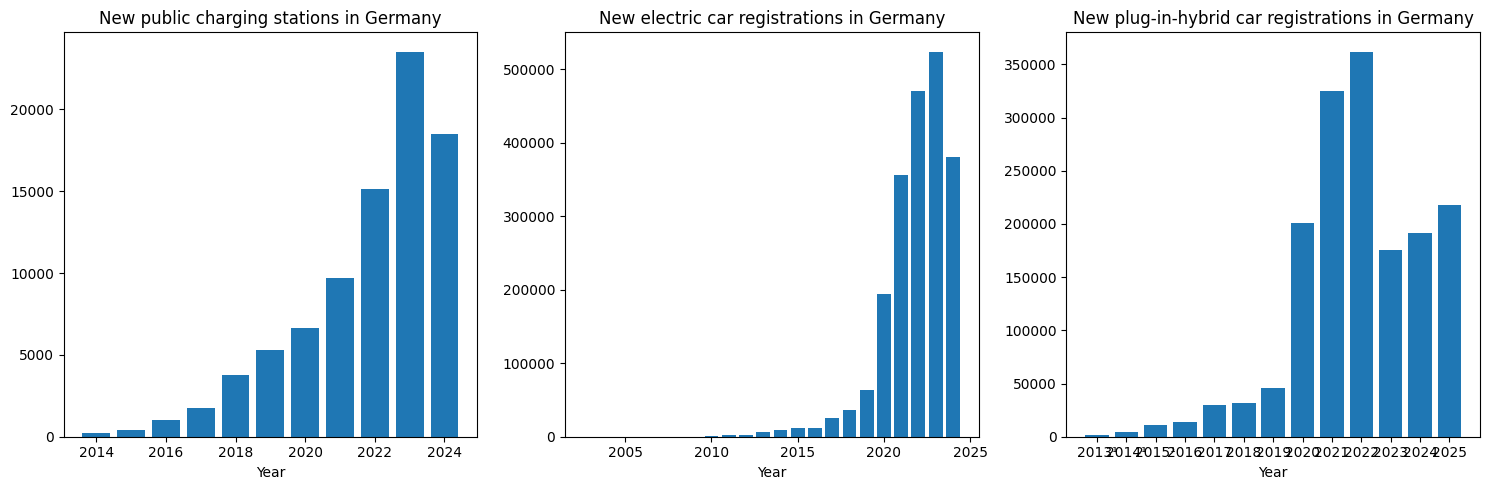

In [165]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.bar(charging_ger["Year"], charging_ger["Amount"])
plt.xlabel("Year")
plt.title("New public charging stations in Germany")

plt.subplot(1, 3, 2)
plt.bar(newregistration_electric_ger["Year"], newregistration_electric_ger["Amount"])
plt.xlabel("Year")
plt.title("New electric car registrations in Germany")

plt.subplot(1, 3, 3)
plt.bar(newregistration_hybrid_ger["Year"], newregistration_hybrid_ger["Amount"])
plt.xlabel("Year")
plt.title("New plug-in-hybrid car registrations in Germany")

plt.tight_layout()
plt.show()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/2110310496.py:3: DtypeWarning: Columns (40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_charging = pd.read_csv(


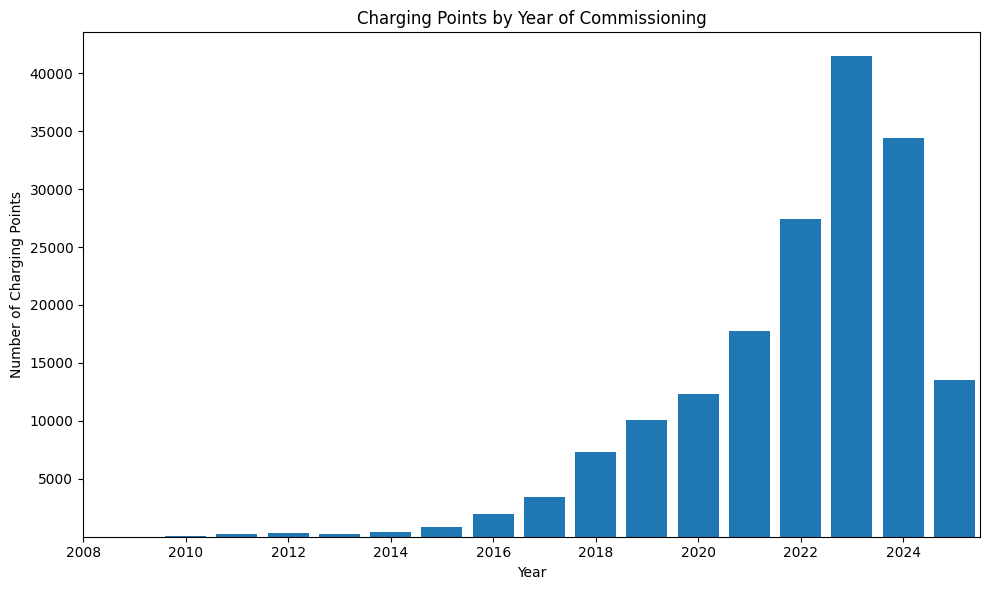

In [166]:
# Data from Bundesnetzagentur

df_charging = pd.read_csv(
    "datasets/Ladesaeulenregister_BNetzA_2025-08-26.csv",
    sep=";",
    encoding="latin1",
    skiprows=10,
    decimal=",",
)

df_charging["Jahr"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
).dt.year

df_charging_cleaned = df_charging.dropna(subset=["Jahr"])
df_charging_cleaned = df_charging_cleaned[
    (df_charging_cleaned["Jahr"] >= 2008)
    & (df_charging_cleaned["Jahr"] <= datetime.now().year)
]

year_summary = (
    df_charging_cleaned.groupby("Jahr")["Anzahl Ladepunkte"]
    .sum()
    .reset_index(name="Anzahl")
)

plt.figure(figsize=(10, 6))
plt.bar(year_summary["Jahr"], year_summary["Anzahl"])
plt.xlabel("Year")
plt.ylabel("Number of Charging Points")
plt.title("Charging Points by Year of Commissioning")

plt.xlim(left=2008, right=year_summary["Jahr"].max() + 0.5)
plt.ylim(bottom=1)

plt.tight_layout()
plt.show()

In [167]:
df_charging["Jahr"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
).dt.year
year_summary = (
    df_charging.groupby("Jahr")["Anzahl Ladepunkte"]
    .sum()
    .reset_index(name="Anzahl Ladepunkte")
)
print("Charging points by Year of Commissioning:")
print(year_summary)

Charging points by Year of Commissioning:
    Jahr  Anzahl Ladepunkte
0   1992                  1
1   2001                  6
2   2003                  3
3   2005                  2
4   2007                  4
5   2008                  2
6   2009                 11
7   2010                 78
8   2011                215
9   2012                290
10  2013                228
11  2014                430
12  2015                864
13  2016               1997
14  2017               3390
15  2018               7325
16  2019              10075
17  2020              12330
18  2021              17739
19  2022              27427
20  2023              41454
21  2024              34436
22  2025              13499


In [168]:
newregistration_monthly = pd.read_csv("datasets/ev_registrations_cleaned.csv")

newregistration_monthly.head()

,Year,Month,Count,Type
0,2014,1,140,Plug-In Hybridautos
1,2014,1,541,Reine Elektroautos
2,2014,2,125,Plug-In Hybridautos
3,2014,2,481,Reine Elektroautos
4,2014,3,156,Plug-In Hybridautos


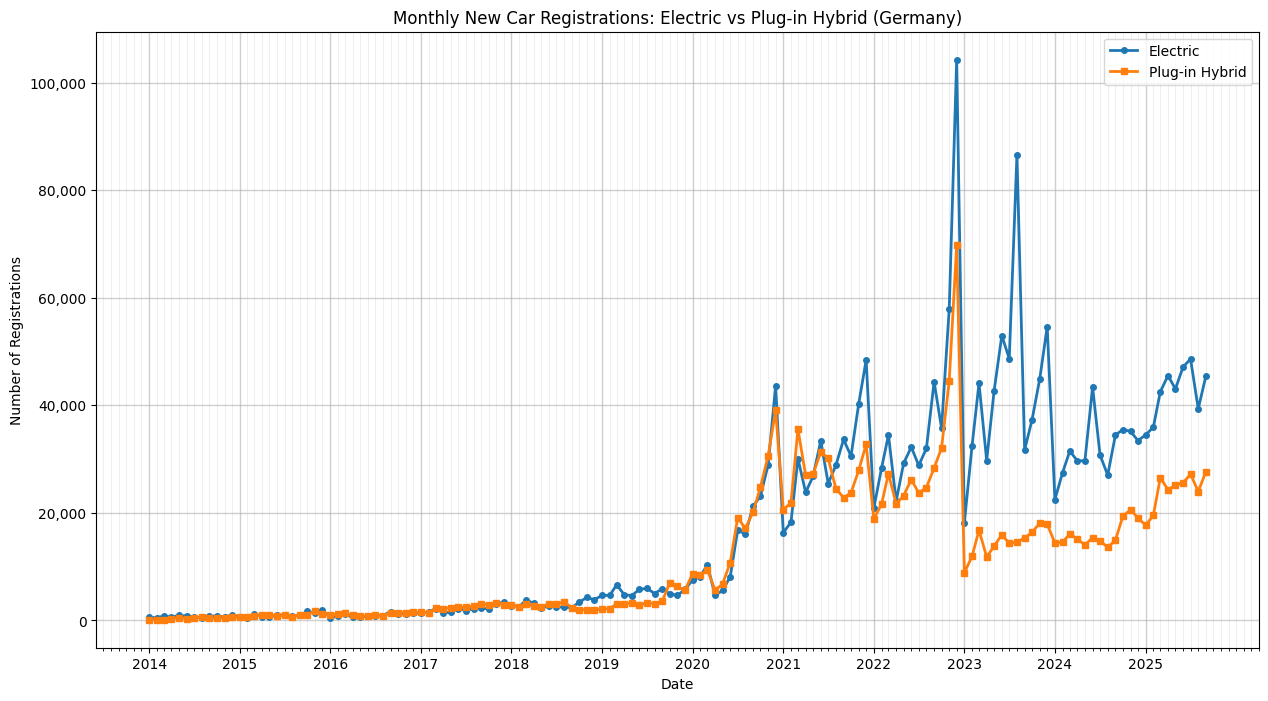

In [169]:
# Without political events

plt.figure(figsize=(15, 8))

newregistration_monthly["Date"] = pd.to_datetime(
    newregistration_monthly["Year"].astype(str)
    + "-"
    + newregistration_monthly["Month"].astype(str)
    + "-01"
)

electric_data = newregistration_monthly[
    newregistration_monthly["Type"] == "Reine Elektroautos"
]
hybrid_data = newregistration_monthly[
    newregistration_monthly["Type"] == "Plug-In Hybridautos"
]

plt.plot(
    electric_data["Date"],
    electric_data["Count"],
    marker="o",
    linewidth=2,
    markersize=4,
    label="Electric",
)
plt.plot(
    hybrid_data["Date"],
    hybrid_data["Count"],
    marker="s",
    linewidth=2,
    markersize=4,
    label="Plug-in Hybrid",
)

plt.xlabel("Date")
plt.ylabel("Number of Registrations")
plt.title("Monthly New Car Registrations: Electric vs Plug-in Hybrid (Germany)")
plt.legend()

ax = plt.gca()

years = range(
    newregistration_monthly["Year"].min(), newregistration_monthly["Year"].max() + 1
)
major_ticks = [pd.to_datetime(f"{year}-01-01") for year in years]
ax.set_xticks(major_ticks)
ax.set_xticklabels([str(year) for year in years])

from matplotlib.dates import MonthLocator, DateFormatter

ax.xaxis.set_minor_locator(MonthLocator())

ax.grid(True, which="major", alpha=0.6, linewidth=1)
ax.grid(True, which="minor", alpha=0.3, linewidth=0.5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

plt.xticks(rotation=0)
plt.show()

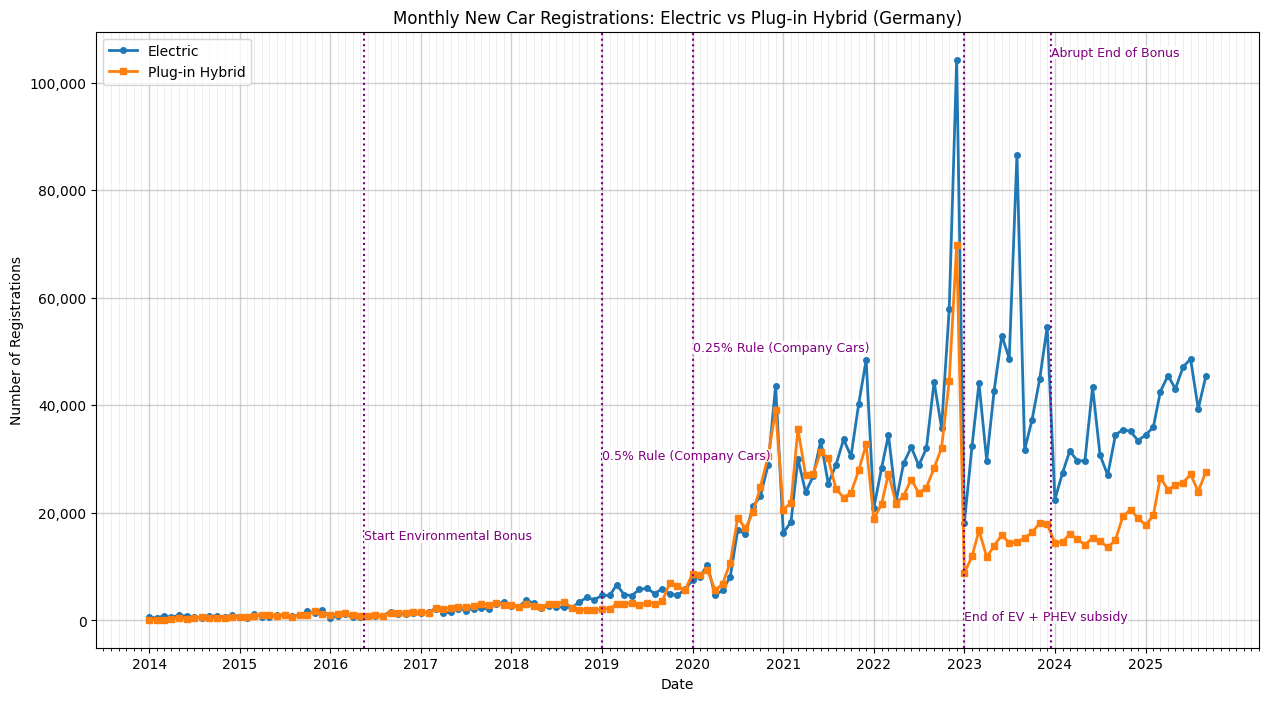

In [170]:
# With political events

plt.figure(figsize=(15, 8))

newregistration_monthly["Date"] = pd.to_datetime(
    newregistration_monthly["Year"].astype(str)
    + "-"
    + newregistration_monthly["Month"].astype(str)
    + "-01"
)

electric_data = newregistration_monthly[
    newregistration_monthly["Type"] == "Reine Elektroautos"
]
hybrid_data = newregistration_monthly[
    newregistration_monthly["Type"] == "Plug-In Hybridautos"
]

plt.plot(
    electric_data["Date"],
    electric_data["Count"],
    marker="o",
    linewidth=2,
    markersize=4,
    label="Electric",
)
plt.plot(
    hybrid_data["Date"],
    hybrid_data["Count"],
    marker="s",
    linewidth=2,
    markersize=4,
    label="Plug-in Hybrid",
)

plt.xlabel("Date")
plt.ylabel("Number of Registrations")
plt.title("Monthly New Car Registrations: Electric vs Plug-in Hybrid (Germany)")
plt.legend()

ax = plt.gca()

years = range(
    newregistration_monthly["Year"].min(), newregistration_monthly["Year"].max() + 1
)
major_ticks = [pd.to_datetime(f"{year}-01-01") for year in years]
ax.set_xticks(major_ticks)
ax.set_xticklabels([str(year) for year in years])

from matplotlib.dates import MonthLocator, DateFormatter

ax.xaxis.set_minor_locator(MonthLocator())

ax.grid(True, which="major", alpha=0.6, linewidth=1)
ax.grid(True, which="minor", alpha=0.3, linewidth=0.5)

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))

events = [
    (datetime(2016, 5, 18), "Start Environmental Bonus"),
    (datetime(2019, 1, 1), "0.5% Rule (Company Cars)"),
    (datetime(2020, 1, 1), "0.25% Rule (Company Cars)"),
    (datetime(2023, 12, 17), "Abrupt End of Bonus"),
    (datetime(2022, 12, 31), "End of EV + PHEV subsidy"),
]
y_pos = [15000, 30000, 50000, 105000, 0]  # 60.000 auf 105.000 erhöht

for i, (date, text) in enumerate(events):
    if date >= electric_data["Date"].min() and date <= electric_data["Date"].max():

        plt.axvline(x=date, color="purple", linestyle=":", linewidth=1.5)

        plt.text(
            date,
            y_pos[i],
            text,
            rotation=0,
            color="purple",
            fontsize=9,
            bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=0.2),
        )

plt.xticks(rotation=0)
plt.show()

# Correlation: Charging Points vs New Registrations

slope: 20.607959119614897 intercept: 3697.570965448078 r-value: 0.7921732090360752 p-value: 8.476505938338164e-29 std_err: 1.4143937130206015


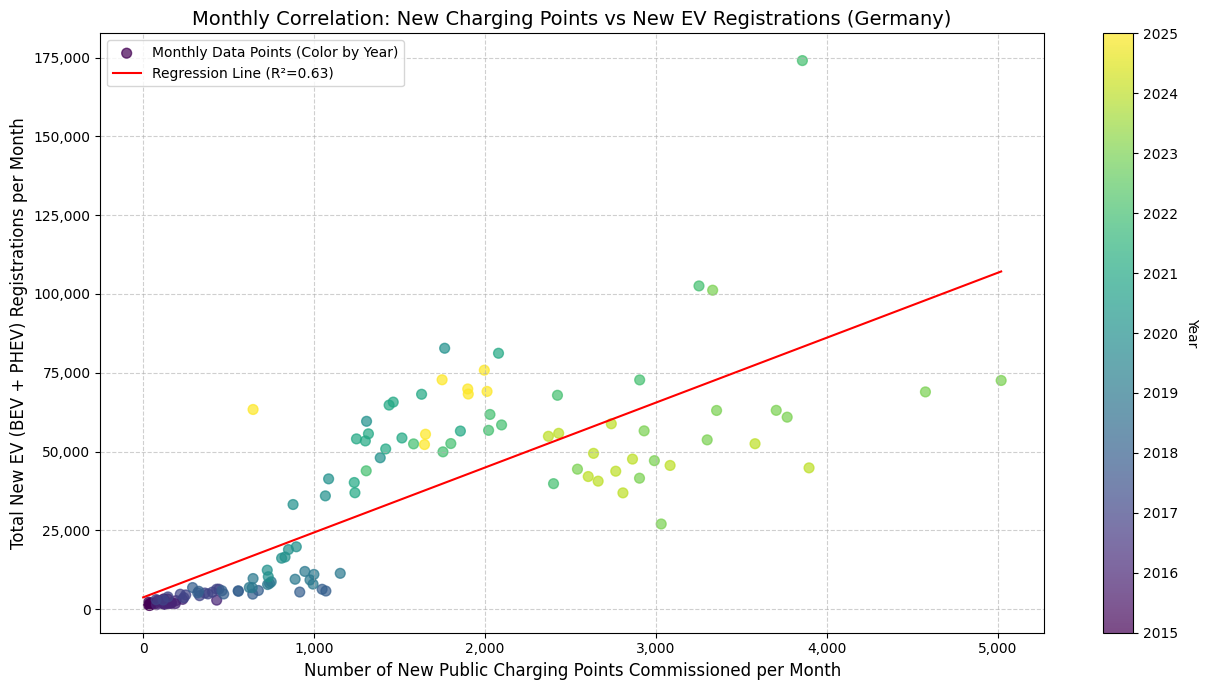

In [171]:
df_charging["Date"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
)
df_charging = df_charging.dropna(subset=["Date"])
df_charging["Anzahl Ladepunkte"] = pd.to_numeric(
    df_charging["Anzahl Ladepunkte"], errors="coerce"
).fillna(0)
df_charging["YearMonth"] = df_charging["Date"].dt.to_period("M")

monthly_new_charging = (
    df_charging.groupby("YearMonth")["Anzahl Ladepunkte"].sum().reset_index()
)
monthly_new_charging.rename(
    columns={"Anzahl Ladepunkte": "NewChargingPoints"}, inplace=True
)
monthly_new_charging["Date"] = monthly_new_charging["YearMonth"].dt.to_timestamp()

df_regs = pd.read_csv("datasets/ev_registrations_cleaned.csv")
df_regs["Date"] = pd.to_datetime(
    df_regs["Year"].astype(str) + "-" + df_regs["Month"].astype(str) + "-01"
)

monthly_total_regs = df_regs.groupby("Date")["Count"].sum().reset_index()
monthly_total_regs.rename(columns={"Count": "TotalNewEVs"}, inplace=True)

merged_monthly = pd.merge(
    monthly_new_charging[["Date", "NewChargingPoints"]],
    monthly_total_regs,
    on="Date",
    how="inner",
)
merged_monthly["Year"] = merged_monthly["Date"].dt.year

start_analysis_date = pd.to_datetime("2015-01-01")

merged_monthly = merged_monthly[merged_monthly["Date"] >= start_analysis_date].copy()

slope, intercept, r_value, p_value, std_err = linregress(
    merged_monthly["NewChargingPoints"], merged_monthly["TotalNewEVs"]
)
print(
    "slope:",
    slope,
    "intercept:",
    intercept,
    "r-value:",
    r_value,
    "p-value:",
    p_value,
    "std_err:",
    std_err,
)

plt.figure(figsize=(13, 7))

scatter = plt.scatter(
    merged_monthly["NewChargingPoints"],
    merged_monthly["TotalNewEVs"],
    c=merged_monthly["Year"],
    cmap="viridis",
    label="Monthly Data Points (Color by Year)",
    alpha=0.7,  # Make points slightly transparent
    s=50,
)

cbar = plt.colorbar(scatter)
cbar.set_label("Year", rotation=270, labelpad=15)
unique_years = sorted(merged_monthly["Year"].unique())
cbar.set_ticks(unique_years)

x_line = np.array([0, merged_monthly["NewChargingPoints"].max()])
y_line = intercept + slope * x_line
plt.plot(x_line, y_line, "r-", label=f"Regression Line (R²={r_value**2:.2f})")

plt.title(
    "Monthly Correlation: New Charging Points vs New EV Registrations (Germany)",
    fontsize=14,
)
plt.xlabel("Number of New Public Charging Points Commissioned per Month", fontsize=12)
plt.ylabel("Total New EV (BEV + PHEV) Registrations per Month", fontsize=12)

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ","))
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()

plt.show()

In [172]:
X = merged_monthly[["NewChargingPoints"]]
X = sm.add_constant(X)
y = merged_monthly["TotalNewEVs"]
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            TotalNewEVs   R-squared:                       0.628
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 28 Oct 2025   Prob (F-statistic):           8.48e-29
Time:                        15:17:21   Log-Likelihood:                -1438.7
No. Observations:                 128   AIC:                             2881.
Df Residuals:                     126   BIC:                             2887.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              3697.5710   2498.09

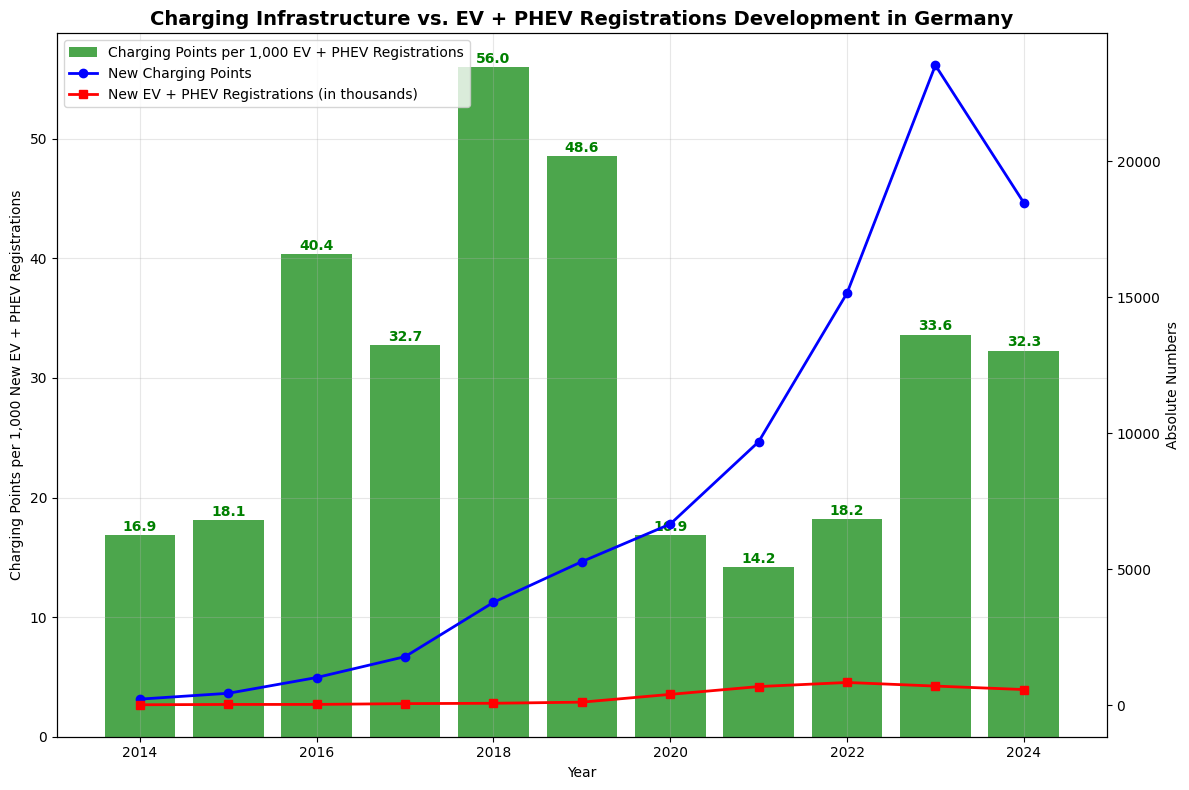

2014: 16.9 points per 1,000 EV + PHEV registrations
2015: 18.1 points per 1,000 EV + PHEV registrations
2016: 40.4 points per 1,000 EV + PHEV registrations
2017: 32.7 points per 1,000 EV + PHEV registrations
2018: 56.0 points per 1,000 EV + PHEV registrations
2019: 48.6 points per 1,000 EV + PHEV registrations
2020: 16.9 points per 1,000 EV + PHEV registrations
2021: 14.2 points per 1,000 EV + PHEV registrations
2022: 18.2 points per 1,000 EV + PHEV registrations
2023: 33.6 points per 1,000 EV + PHEV registrations
2024: 32.3 points per 1,000 EV + PHEV registrations

Average ratio: 29.8 points per 1,000 EV + PHEV registrations
Trend: Improving infrastructure ratio
Correlation between new charging points and EV + PHEV registrations: 0.876


In [173]:
yearly_registrations = (
    newregistration_monthly.groupby(["Year", "Type"])["Count"].sum().reset_index()
)
yearly_totals = yearly_registrations.groupby("Year")["Count"].sum().reset_index()
yearly_totals.rename(columns={"Count": "total_ev_registrations"}, inplace=True)

charging_points_ger = (
    df_charging_cleaned.groupby("Jahr")["Anzahl Ladepunkte"].sum().reset_index()
)
charging_points_ger.rename(
    columns={"Jahr": "Year", "Anzahl Ladepunkte": "new_charging_points"}, inplace=True
)

ratio_data = pd.merge(
    charging_ger.rename(columns={"Year": "Year", "Amount": "new_charging_points"}),
    yearly_totals,
    on="Year",
    how="inner",
)

ratio_data["points_per_1000_registrations"] = (
    ratio_data["new_charging_points"] / ratio_data["total_ev_registrations"]
) * 1000


fig, ax1 = plt.subplots(figsize=(12, 8))

bars = ax1.bar(
    ratio_data["Year"],
    ratio_data["points_per_1000_registrations"],
    color="green",
    alpha=0.7,
    label="Charging Points per 1,000 EV + PHEV Registrations",
)
ax1.set_xlabel("Year")
ax1.set_ylabel("Charging Points per 1,000 New EV + PHEV Registrations", color="black")
ax1.tick_params(axis="y", labelcolor="black")

for bar in bars:
    height = bar.get_height()
    ax1.text(
        bar.get_x() + bar.get_width() / 2.0,
        height + 0.1,
        f"{height:.1f}",
        ha="center",
        va="bottom",
        color="green",
        fontweight="bold",
    )

ax2 = ax1.twinx()
ax2.plot(
    ratio_data["Year"],
    ratio_data["new_charging_points"],
    color="blue",
    marker="o",
    linewidth=2,
    markersize=6,
    label="New Charging Points",
)
ax2.plot(
    ratio_data["Year"],
    ratio_data["total_ev_registrations"] / 1000,
    color="red",
    marker="s",
    linewidth=2,
    markersize=6,
    label="New EV + PHEV Registrations (in thousands)",
)
ax2.set_ylabel("Absolute Numbers", color="black")

ax1.set_title(
    "Charging Infrastructure vs. EV + PHEV Registrations Development in Germany",
    fontsize=14,
    fontweight="bold",
)
ax1.grid(True, alpha=0.3)

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

plt.tight_layout()
plt.show()

for _, row in ratio_data.iterrows():
    print(
        f"{int(row['Year'])}: {row['points_per_1000_registrations']:.1f} points per 1,000 EV + PHEV registrations"
    )

print(
    f"\nAverage ratio: {ratio_data['points_per_1000_registrations'].mean():.1f} points per 1,000 EV + PHEV registrations"
)
print(
    f"Trend: {'Improving' if ratio_data['points_per_1000_registrations'].iloc[-1] > ratio_data['points_per_1000_registrations'].iloc[0] else 'Declining'} infrastructure ratio"
)

correlation = ratio_data["new_charging_points"].corr(
    ratio_data["total_ev_registrations"]
)
print(
    f"Correlation between new charging points and EV + PHEV registrations: {correlation:.3f}"
)

# Infrastucture by States

In [174]:
df_charging = pd.read_csv(
    "datasets/Ladesaeulenregister_BNetzA_2025-08-26.csv",
    sep=";",
    encoding="latin1",
    skiprows=10,
    decimal=",",
)
df_charging.head()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/2894235816.py:1: DtypeWarning: Columns (40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_charging = pd.read_csv(


,Ladeeinrichtungs-ID,Betreiber,Anzeigename (Karte),Status,Art der Ladeeinrichtung,Anzahl Ladepunkte,Nennleistung Ladeeinrichtung [kW],Inbetriebnahmedatum,Straße,Hausnummer,...,EVSE-ID4,Public Key4,Steckertypen5,Nennleistung Stecker5,EVSE-ID5,Public Key5,Steckertypen6,Nennleistung Stecker6,EVSE-ID6,Public Key6
0,1010338,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik GmbH,In Betrieb,Normalladeeinrichtung,2,22.0,11.01.2020,Ennabeurer Weg,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1063962,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,4,22.0,23.11.2022,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1063963,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,4,22.0,23.11.2022,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1063964,smopi® - Multi Chargepoint Solution GmbH,smopi,In Betrieb,Normalladeeinrichtung,2,22.0,23.11.2022,Albstraße,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1010329,Albwerk Elektro- und Kommunikationstechnik GmbH,Albwerk Elektro- und Kommunikationstechnik GmbH,In Betrieb,Normalladeeinrichtung,2,22.0,07.01.2019,Parkplatz Campingplatz,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
bundesland_summary_stations = (
    df_charging.groupby("Bundesland").size().reset_index(name="Anzahl")
)
bundesland_summary_stations_sorted = bundesland_summary_stations.sort_values(
    ["Anzahl"], ascending=False
)
print("Charging Stations by State:")
print(bundesland_summary_stations_sorted)

Charging Stations by State:
                Bundesland  Anzahl
1                   Bayern   18981
9      Nordrhein-Westfalen   17933
0        Baden-Württemberg   15659
8            Niedersachsen    9235
6                   Hessen    7464
10         Rheinland-Pfalz    3778
14      Schleswig-Holstein    3576
2                   Berlin    3564
12                 Sachsen    3307
3              Brandenburg    2520
5                  Hamburg    1933
15               Thüringen    1892
13          Sachsen-Anhalt    1525
7   Mecklenburg-Vorpommern    1342
4                   Bremen     685
11                Saarland     676


In [176]:
bundesland_summary_points = (
    df_charging.groupby("Bundesland")["Anzahl Ladepunkte"]
    .sum()
    .reset_index(name="Anzahl")
)

bundesland_summary_points_sorted = bundesland_summary_points.sort_values(
    ["Anzahl"], ascending=False
)

print("Charging Points by State:")
print(bundesland_summary_points_sorted)

Charging Points by State:
                Bundesland  Anzahl
1                   Bayern   33321
9      Nordrhein-Westfalen   33212
0        Baden-Württemberg   29613
8            Niedersachsen   16904
6                   Hessen   13784
10         Rheinland-Pfalz    6769
14      Schleswig-Holstein    6753
12                 Sachsen    6199
2                   Berlin    5975
3              Brandenburg    4168
5                  Hamburg    3643
15               Thüringen    3563
13          Sachsen-Anhalt    2915
7   Mecklenburg-Vorpommern    2372
4                   Bremen    1315
11                Saarland    1300


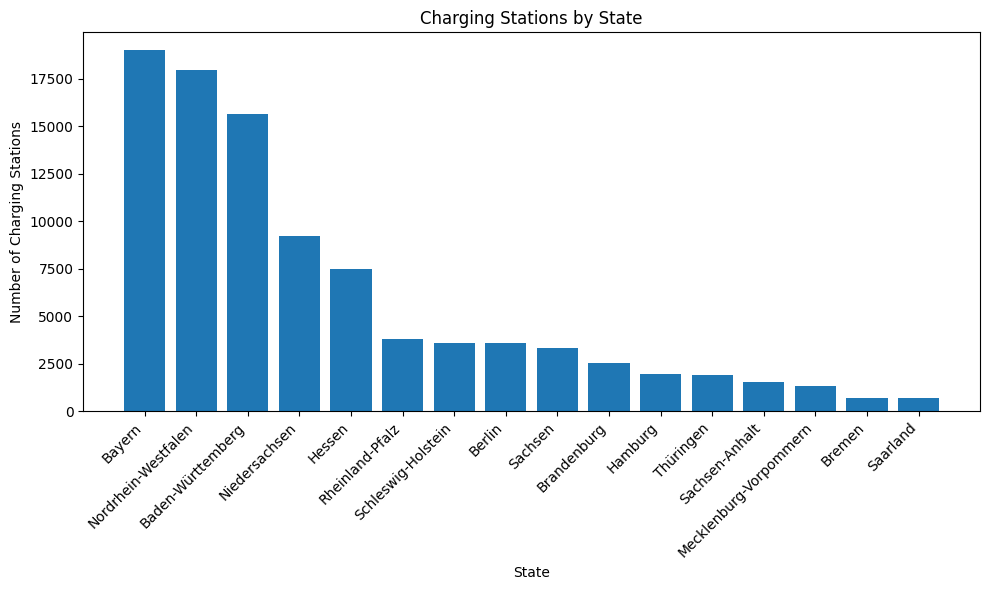

In [177]:
plt.figure(figsize=(10, 6))
plt.bar(
    bundesland_summary_stations_sorted["Bundesland"],
    bundesland_summary_stations_sorted["Anzahl"],
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")
plt.ylabel("Number of Charging Stations")
plt.title("Charging Stations by State")
plt.tight_layout()
plt.show()

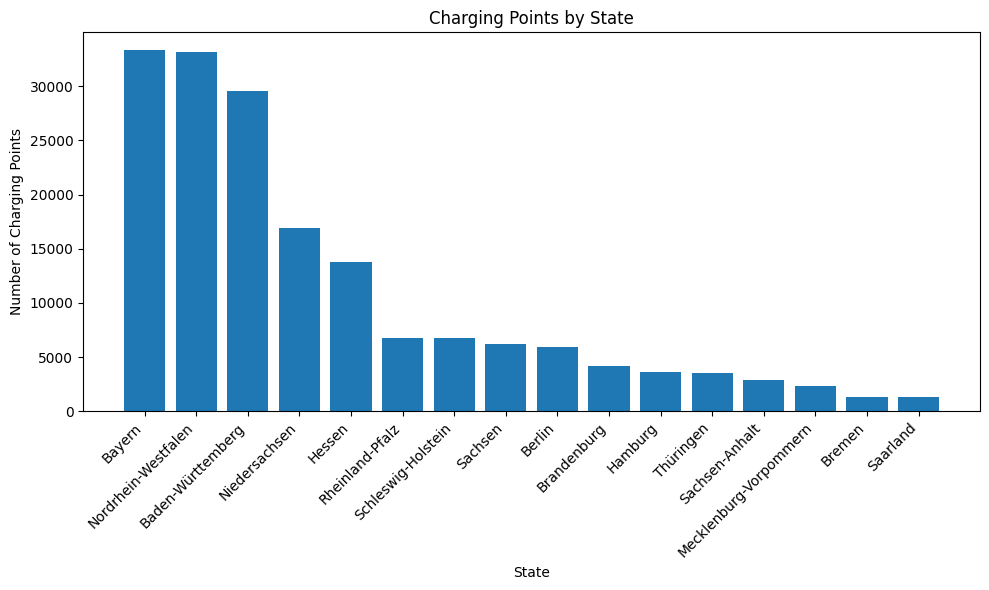

In [178]:
plt.figure(figsize=(10, 6))
plt.bar(
    bundesland_summary_points_sorted["Bundesland"],
    bundesland_summary_points_sorted["Anzahl"],
)
plt.xticks(rotation=45, ha="right")
plt.xlabel("State")

plt.ylabel("Number of Charging Points")
plt.title("Charging Points by State")

plt.tight_layout()
plt.show()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/3802567815.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", num_states)


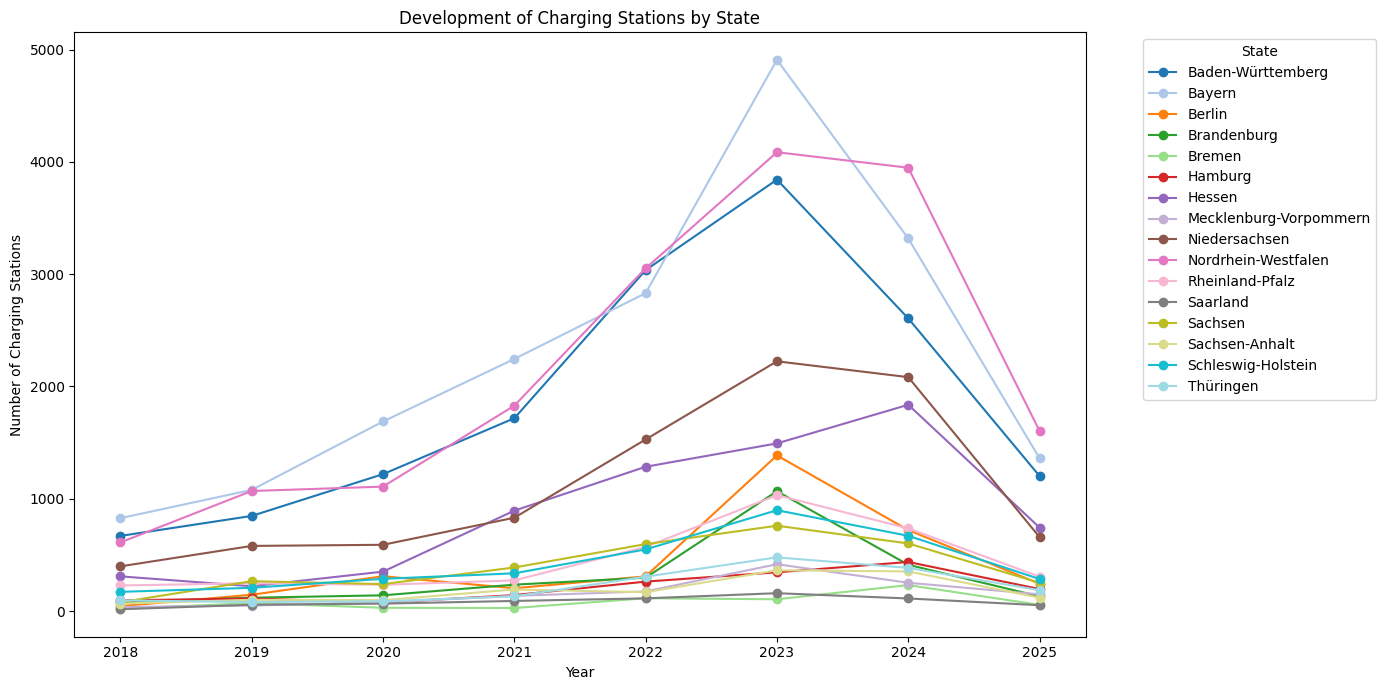

In [179]:
df_charging["Jahr"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
).dt.year

jahre_int = df_charging["Jahr"].dropna().astype(int)
df_jahr_int = df_charging[
    (jahre_int == df_charging["Jahr"]) & (df_charging["Jahr"] >= 2018)
]
years = sorted(df_jahr_int["Jahr"].unique())
pivot_line = df_jahr_int[df_jahr_int["Jahr"].isin(years)].pivot_table(
    index="Jahr",
    columns="Bundesland",
    values="Inbetriebnahmedatum",
    aggfunc="count",
    fill_value=0,
)
num_states = len(pivot_line.columns)
colors = cm.get_cmap("tab20", num_states)
plt.figure(figsize=(14, 7))
for i, state in enumerate(pivot_line.columns):
    plt.plot(
        pivot_line.index, pivot_line[state], marker="o", label=state, color=colors(i)
    )
plt.xlabel("Year")
plt.ylabel("Number of Charging Stations")
plt.title("Development of Charging Stations by State")
plt.xticks(years)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/3624318109.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", num_states)


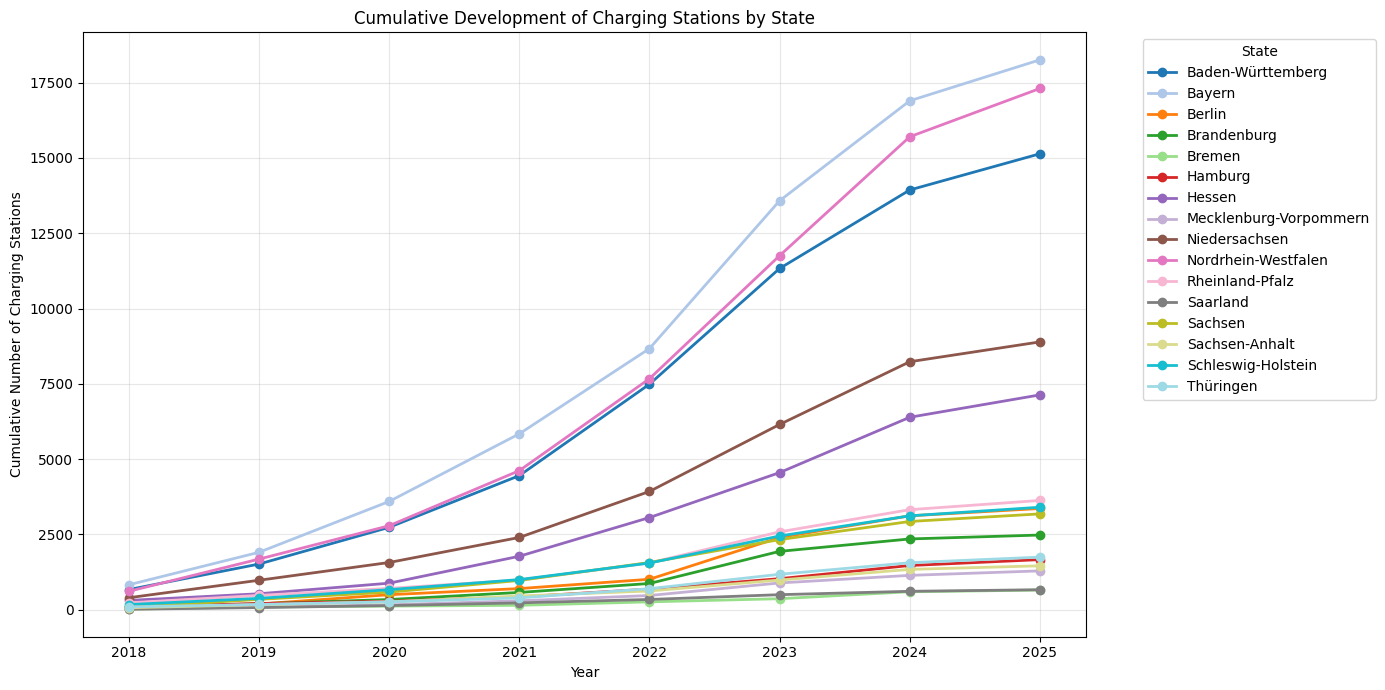

In [180]:
pivot_cumulative = df_jahr_int[df_jahr_int["Jahr"].isin(years)].pivot_table(
    index="Jahr",
    columns="Bundesland",
    values="Inbetriebnahmedatum",
    aggfunc="count",
    fill_value=0,
)

pivot_cumulative = pivot_cumulative.cumsum()

num_states = len(pivot_cumulative.columns)
colors = cm.get_cmap("tab20", num_states)

plt.figure(figsize=(14, 7))
for i, state in enumerate(pivot_cumulative.columns):
    plt.plot(
        pivot_cumulative.index,
        pivot_cumulative[state],
        marker="o",
        label=state,
        color=colors(i),
        linewidth=2,
    )

plt.xlabel("Year")
plt.ylabel("Cumulative Number of Charging Stations")
plt.title("Cumulative Development of Charging Stations by State")
plt.xticks(years)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/1329617904.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", num_states)


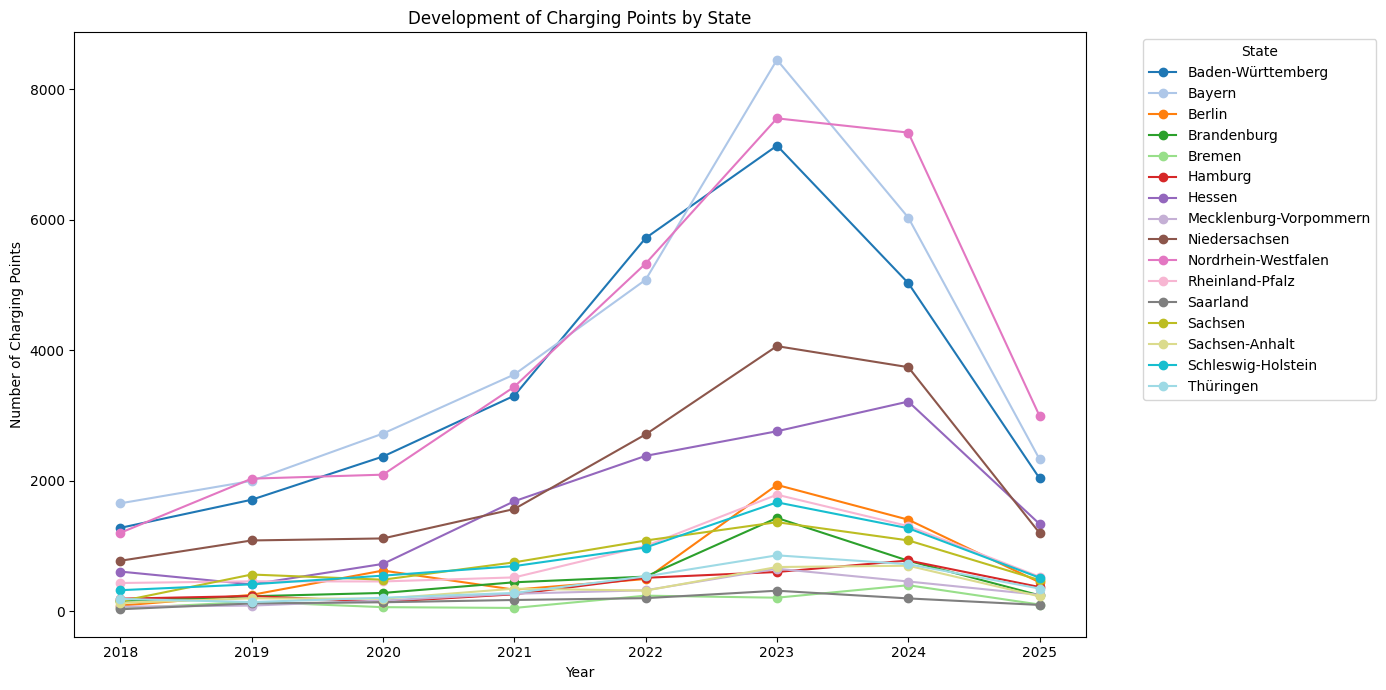

In [181]:
df_charging["Jahr"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
).dt.year

jahre_int = df_charging["Jahr"].dropna().astype(int)
df_jahr_int = df_charging[
    (jahre_int == df_charging["Jahr"]) & (df_charging["Jahr"] >= 2018)
]
years = sorted(df_jahr_int["Jahr"].unique())


pivot_line = df_jahr_int[df_jahr_int["Jahr"].isin(years)].pivot_table(
    index="Jahr",
    columns="Bundesland",
    values="Anzahl Ladepunkte",
    aggfunc="sum",
    fill_value=0,
)

num_states = len(pivot_line.columns)
colors = cm.get_cmap("tab20", num_states)

plt.figure(figsize=(14, 7))
for i, state in enumerate(pivot_line.columns):
    plt.plot(
        pivot_line.index, pivot_line[state], marker="o", label=state, color=colors(i)
    )

plt.xlabel("Year")

plt.ylabel("Number of Charging Points")
plt.title("Development of Charging Points by State")

plt.xticks(years)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/3271035224.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("tab20", num_states)


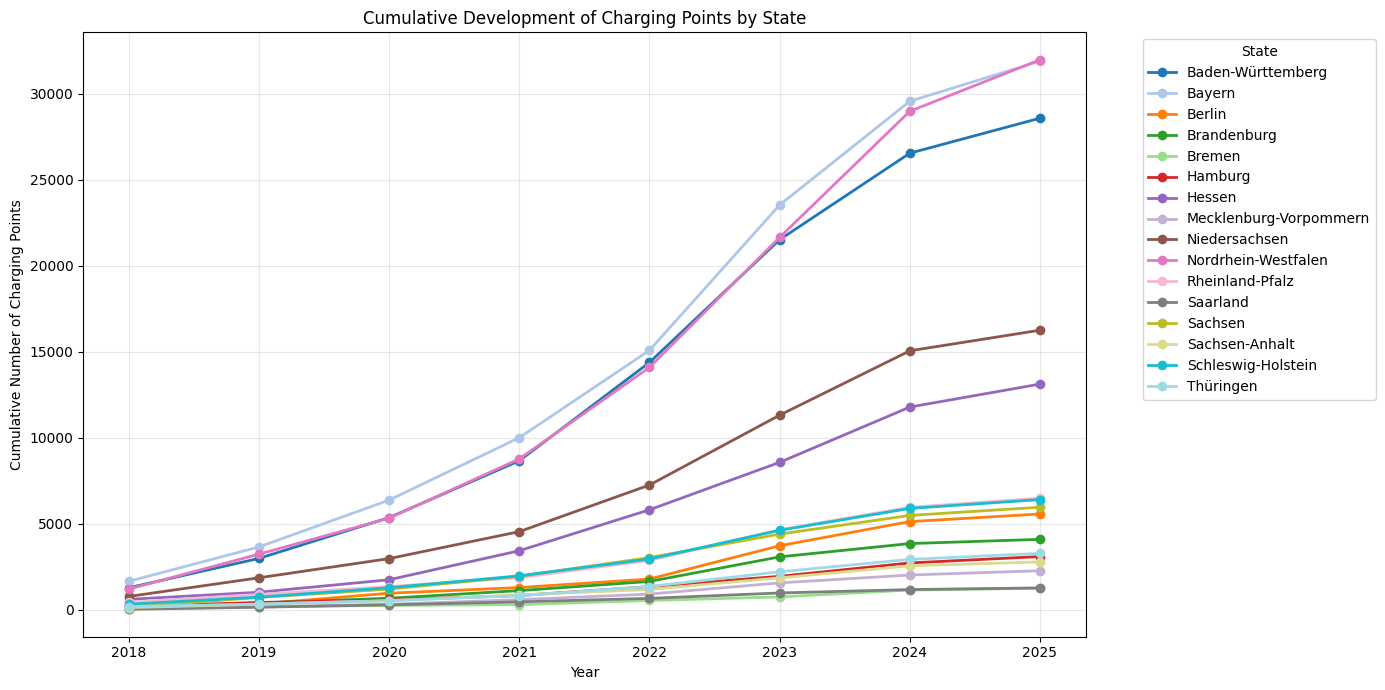

In [182]:
pivot_cumulative = df_jahr_int[df_jahr_int["Jahr"].isin(years)].pivot_table(
    index="Jahr",
    columns="Bundesland",
    values="Anzahl Ladepunkte",
    aggfunc="sum",
    fill_value=0,
)

pivot_cumulative = pivot_cumulative.cumsum()


num_states = len(pivot_cumulative.columns)
colors = cm.get_cmap("tab20", num_states)

plt.figure(figsize=(14, 7))
for i, state in enumerate(pivot_cumulative.columns):
    plt.plot(
        pivot_cumulative.index,
        pivot_cumulative[state],
        marker="o",
        label=state,
        color=colors(i),
        linewidth=2,
    )

plt.xlabel("Year")

plt.ylabel("Cumulative Number of Charging Points")
plt.title("Cumulative Development of Charging Points by State")

plt.xticks(years)
plt.legend(title="State", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Overview of charging Points in German cities

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/3082362533.py:1: DtypeWarning: Columns (40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cities = pd.read_csv(



--- Overall Analysis (Total Charging Points per Location) ---
Overall Average Points per Location: 22.48

--- Yearly Analysis (New Points Installed per Location each Year) ---
Yearly Statistics Summary:
 Year  Top Charging Points Top Location Average New Points Median New Points
 2010                    4   Gevelsberg               2.23               2.0
 2011                   14   Düsseldorf               2.53               2.0
 2012                   78          Ulm               3.22               2.0
 2013                   20         Köln               2.75               2.0
 2014                   22         Köln               2.77               2.0
 2015                  134      Hamburg               4.17               2.0
 2016                  173       Berlin               4.06               2.0
 2017                  312      München               4.31               2.0
 2018                  386      München               4.81               2.0
 2019                  440

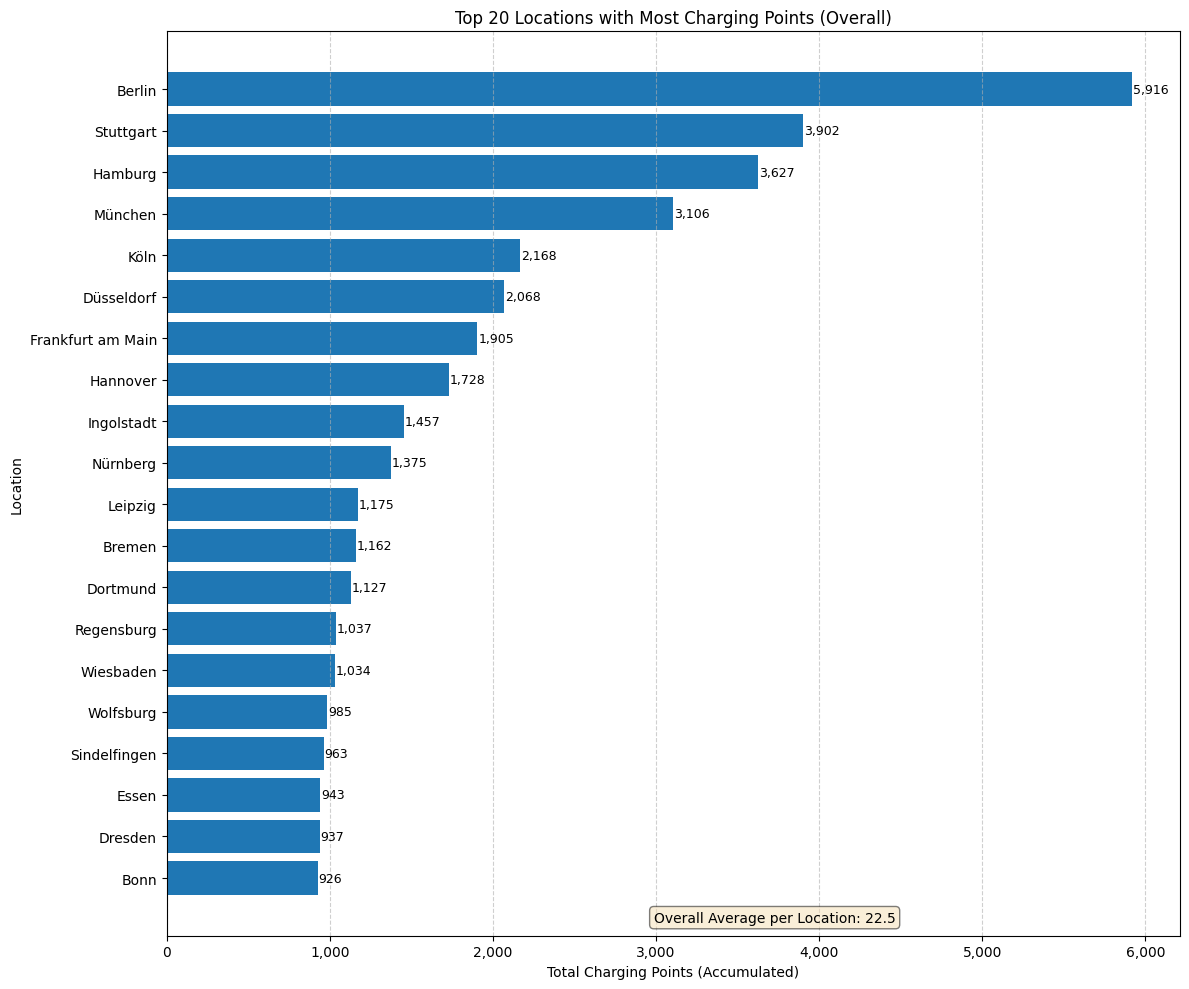

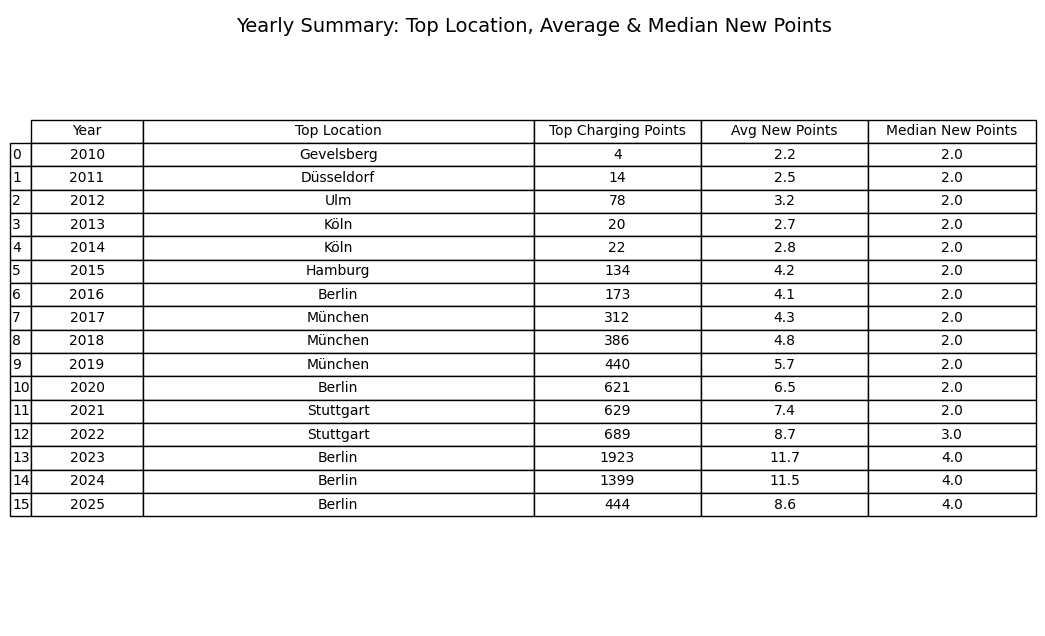

In [183]:
df_cities = pd.read_csv(
        "datasets/Ladesaeulenregister_BNetzA_2025-08-26.csv",
        sep=";",
        encoding="latin1",
        skiprows=10,
        decimal=",",
    )
df_cities.columns = df_cities.columns.str.strip()

df_cities["Date"] = pd.to_datetime(
    df_cities["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
)
df_cities["Year"] = df_cities["Date"].dt.year
df_cities["Anzahl Ladepunkte"] = (
    pd.to_numeric(df_cities["Anzahl Ladepunkte"], errors="coerce").fillna(0).astype(int)
)
df_cities["Ort"] = df_cities["Ort"].str.strip()

current_year = datetime.now().year
df_cities_cleaned = df_cities.dropna(subset=["Date", "Year", "Ort"])
df_cities_cleaned = df_cities_cleaned[df_cities_cleaned["Year"] >= 2010]
df_cities_cleaned = df_cities_cleaned[df_cities_cleaned["Year"] <= current_year]
df_cities_cleaned = df_cities_cleaned[df_cities_cleaned["Anzahl Ladepunkte"] > 0]
df_cities_cleaned["Year"] = df_cities_cleaned["Year"].astype(int)

print("\n--- Overall Analysis (Total Charging Points per Location) ---")
overall_points = (
    df_cities_cleaned.groupby("Ort")["Anzahl Ladepunkte"].sum().reset_index()
)
overall_points_sorted = overall_points.sort_values(
    by="Anzahl Ladepunkte", ascending=False
)

overall_avg_points = overall_points_sorted["Anzahl Ladepunkte"].mean()
print(f"Overall Average Points per Location: {overall_avg_points:.2f}")

print("\n--- Yearly Analysis (New Points Installed per Location each Year) ---")
yearly_new_points = (
    df_cities_cleaned.groupby(["Year", "Ort"])["Anzahl Ladepunkte"].sum().reset_index()
)

yearly_stats = []
unique_years = sorted(df_cities_cleaned["Year"].unique())
for year in unique_years:
    year_data = yearly_new_points[yearly_new_points["Year"] == year]
    if not year_data.empty:
        yearly_max_row = year_data.loc[year_data["Anzahl Ladepunkte"].idxmax()]
        yearly_avg = year_data["Anzahl Ladepunkte"].mean()
        yearly_median = year_data["Anzahl Ladepunkte"].median()
        yearly_stats.append(
            {
                "Year": year,
                "Top Charging Points": int(yearly_max_row["Anzahl Ladepunkte"]),
                "Top Location": yearly_max_row["Ort"],
                "Average New Points": yearly_avg,
                "Median New Points": yearly_median,
            }
        )

yearly_stats_df = pd.DataFrame(yearly_stats)
yearly_stats_df_display = yearly_stats_df.copy()
yearly_stats_df_display["Average New Points"] = yearly_stats_df_display[
    "Average New Points"
].map("{:.2f}".format)
yearly_stats_df_display["Median New Points"] = yearly_stats_df_display[
    "Median New Points"
].map("{:.1f}".format)
print("Yearly Statistics Summary:")
print(yearly_stats_df_display.to_string(index=False))

N = 20
top_n_locations = overall_points_sorted.head(N).sort_values(
    by="Anzahl Ladepunkte", ascending=True
)

plt.figure(figsize=(12, 10))
bars_overall_top = plt.barh(
    top_n_locations["Ort"], top_n_locations["Anzahl Ladepunkte"]
)
for bar in bars_overall_top:
    width = bar.get_width()
    plt.text(
        width + 5,
        bar.get_y() + bar.get_height() / 2,
        f"{int(width):,}",
        ha="left",
        va="center",
        fontsize=9,
    )

plt.text(
    0.6,
    0.02,
    f"Overall Average per Location: {overall_avg_points:.1f}",
    ha="center",
    va="center",
    transform=plt.gca().transAxes,
    fontsize=10,
    bbox=dict(boxstyle="round,pad=0.3", fc="wheat", alpha=0.5),
)

plt.xlabel("Total Charging Points (Accumulated)")
plt.ylabel("Location")
plt.title(f"Top {N} Locations with Most Charging Points (Overall)")
plt.gca().xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ","))
)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

fig_table, ax_table = plt.subplots(figsize=(12, 8))
ax_table.axis("tight")
ax_table.axis("off")

table_data = yearly_stats_df[
    [
        "Year",
        "Top Location",
        "Top Charging Points",
        "Average New Points",
        "Median New Points",
    ]
].copy()
table_data.rename(
    columns={
        "Top Location": "Top Location",
        "op Charging Points": "op Charging Points",
        "Average New Points": "Avg New Points",
        "Median New Points": "Median New Points",
    },
    inplace=True,
)
table_data["Avg New Points"] = table_data["Avg New Points"].map("{:.1f}".format)
table_data["Median New Points"] = table_data["Median New Points"].map("{:.1f}".format)

the_table = table(
    ax_table,
    table_data,
    loc="center",
    cellLoc="center",
    colWidths=[0.1, 0.35, 0.15, 0.15, 0.15],
)

the_table.auto_set_font_size(False)
the_table.set_fontsize(10)
the_table.scale(1.2, 1.4)

plt.title(
    "Yearly Summary: Top Location, Average & Median New Points", y=0.95, fontsize=14
)
plt.show()

In [184]:
df_cities = pd.read_csv(
        "datasets/Ladesaeulenregister_BNetzA_2025-08-26.csv",
        sep=";",
        encoding="latin1",
        skiprows=10,
        decimal=",",
    )
df_cities.columns = df_cities.columns.str.strip()

df_cities["Date"] = pd.to_datetime(
    df_cities["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
)
df_cities["Anzahl Ladepunkte"] = (
    pd.to_numeric(df_cities["Anzahl Ladepunkte"], errors="coerce").fillna(0).astype(int)
)
df_cities["Ort"] = df_cities["Ort"].str.strip()

df_cities_cleaned = df_cities.dropna(subset=["Date", "Ort"])
df_cities_cleaned = df_cities_cleaned[df_cities_cleaned["Anzahl Ladepunkte"] > 0]

total_points_per_location = (
    df_cities_cleaned.groupby("Ort")["Anzahl Ladepunkte"].sum().reset_index()
)

min_locations = total_points_per_location[
    total_points_per_location["Anzahl Ladepunkte"] == 1
]

count_min_locations = len(min_locations)

if count_min_locations > 0:
    print(f"\nFound {count_min_locations:,} locations with exactly 1 charging point:")
    location_list = min_locations["Ort"].tolist()
    print(", ".join(location_list[:50]) + ("..." if count_min_locations > 50 else ""))


Found 562 locations with exactly 1 charging point:
Absberg, Achim bei Bremen, Aholfing, Ahrenshagen-Daskow, Alten-Buseck, Altenbuch, Altendiez, Altenmedingen, Altlandsberg, Altmittweida, Altwarp, Altwittenbek, Am Ohmberg, Andervenne, Armsheim, Arnstandt, Attenhofen, Atting, Auhagen, Auma-Weidatal, Bachhagel, Bad Breisig, Bad Neuenahr -Ahrweiler, Bad Neustadt an der Saale, Bad Soden (Schmitten), Baden-Württemberg - Furtwangen, Baierbach, Bakum-Lüsche, Balduinstein, Barver, Bastheim, Bayern - Trabitz, Beesten, Bendestorf, Berg im Gau, Berghofen, Bernstorf, Bestwig-Ostwig, Bettenfeld, Beuern, Beuren-Prosterath, Biberach Deutschland, Biebern, Biedershausen, Billigheim-Ingenheim, Bimbach, Binnen, Bippen, Birkenheide, Birnbach...


/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/380625229.py:1: DtypeWarning: Columns (40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_cities = pd.read_csv(


# Forecasting

/var/folders/dp/fg7q0mh57g178zjx12p6lglc0000gn/T/ipykernel_70057/2716515523.py:1: DtypeWarning: Columns (40,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_charging = pd.read_csv(
/Users/florianrobrecht/Documents/GitHub/DA-project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


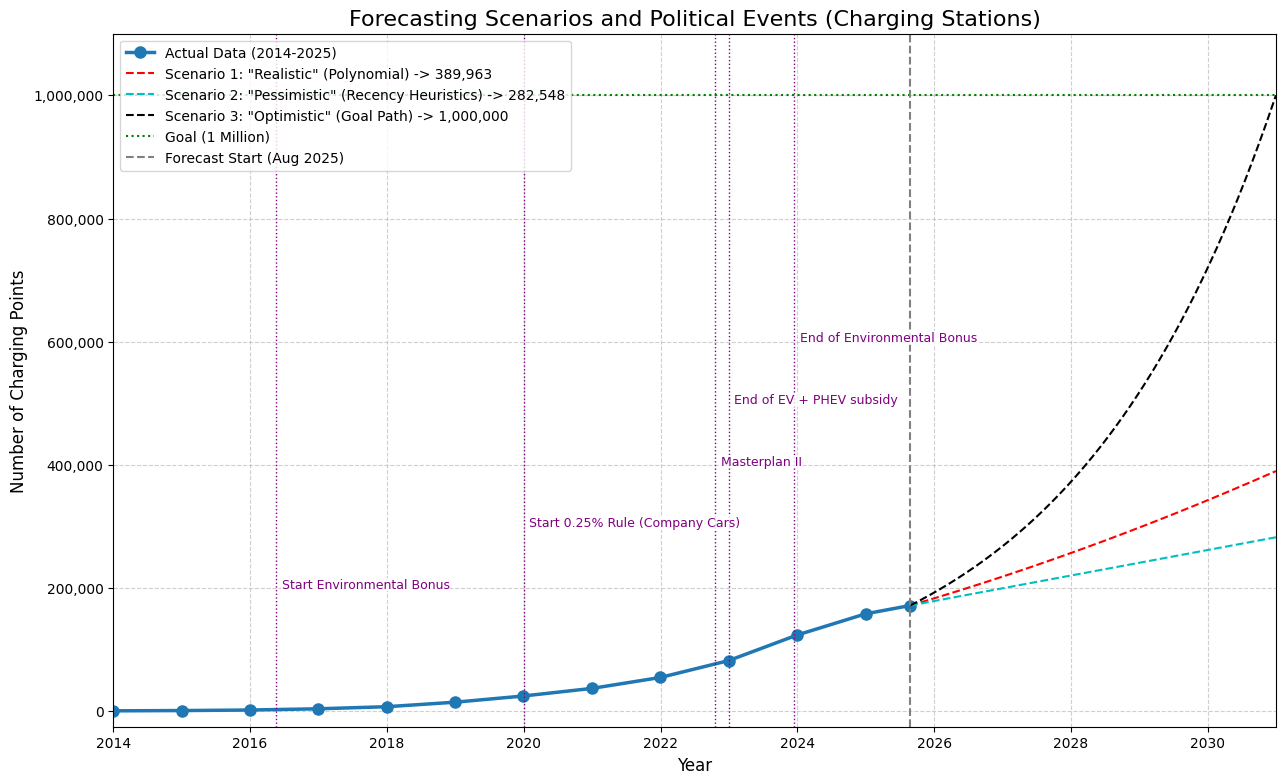

In [185]:
df_charging = pd.read_csv(
        "datasets/Ladesaeulenregister_BNetzA_2025-08-26.csv",
        sep=";",
        encoding="latin1",
        skiprows=10,
        decimal=",",
    )

df_charging["Date"] = pd.to_datetime(
    df_charging["Inbetriebnahmedatum"], format="%d.%m.%Y", errors="coerce"
)
df_charging = df_charging.dropna(subset=["Date"])

df_charging["Anzahl Ladepunkte"] = pd.to_numeric(
    df_charging["Anzahl Ladepunkte"], errors="coerce"
).fillna(0)
df_charging["Year"] = df_charging["Date"].dt.year

df_charging = df_charging[(df_charging["Year"] >= 2010) & (df_charging["Year"] <= 2025)]

points_per_year = df_charging.groupby("Year")["Anzahl Ladepunkte"].sum().reset_index()
points_per_year["Gesamtbestand"] = points_per_year["Anzahl Ladepunkte"].cumsum()

df = points_per_year[["Year", "Gesamtbestand"]].copy()
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-12-31")

last_real_date = df_charging["Date"].max()
df.loc[df.index[-1], "Date"] = last_real_date

start_date = df["Date"].min()
df["Days"] = (df["Date"] - start_date).dt.days

X_all = df[["Days"]]
y_all = df["Gesamtbestand"]


current_date = df["Date"].max()
current_points = df["Gesamtbestand"].max()
target_date_goal = datetime(2030, 12, 31)
target_points_goal = 1000000
days_to_goal = (target_date_goal - current_date).days


future_days_rel = np.arange(0, days_to_goal + 1)
future_days_abs = future_days_rel + df["Days"].max()
X_future = future_days_abs.reshape(-1, 1)
future_dates = [current_date + pd.Timedelta(days=int(d)) for d in future_days_rel]


# "Realistic" (Polynomic Regression)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_all, y_all)
y_pred_poly = poly_model.predict(X_future)
y_pred_poly_anchored = y_pred_poly - y_pred_poly[0] + current_points
prediction_poly = y_pred_poly_anchored[-1]


# "Pessimistic" (Recency Heursistics)
p_last = df.iloc[-1]
p_second_last = df.iloc[-2]

days_diff = p_last["Days"] - p_second_last["Days"]
points_diff = p_last["Gesamtbestand"] - p_second_last["Gesamtbestand"]
daily_growth_recency = points_diff / days_diff

y_pred_recency = current_points + (daily_growth_recency * future_days_rel)
prediction_recency = y_pred_recency[-1]


# "Optimistic" (Exponential - Goal)
P_0 = current_points
P_t = target_points_goal
t = days_to_goal
r_required = np.log(P_t / P_0) / t
y_exp_required = P_0 * np.exp(r_required * future_days_rel)
t_exp_dates_required = [
    current_date + pd.Timedelta(days=int(d)) for d in future_days_rel
]


plt.figure(figsize=(15, 9))

plt.plot(
    df["Date"],
    df["Gesamtbestand"],
    marker="o",
    label="Actual Data (2014-2025)",
    linewidth=2.5,
    markersize=8,
)

plt.plot(
    future_dates,
    y_pred_poly_anchored,
    "r--",
    label=f'Scenario 1: "Realistic" (Polynomial) -> {int(prediction_poly):,}',
)

plt.plot(
    future_dates,
    y_pred_recency,
    "c--",
    label=f'Scenario 2: "Pessimistic" (Recency Heuristics) -> {int(prediction_recency):,}',
)

plt.plot(
    t_exp_dates_required,
    y_exp_required,
    "k--",
    label=f'Scenario 3: "Optimistic" (Goal Path) -> {target_points_goal:,}',
)

plt.axhline(y=target_points_goal, color="g", linestyle=":", label="Goal (1 Million)")

plt.title("Forecasting Scenarios and Political Events (Charging Stations)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Charging Points", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

plt.axvline(
    x=current_date, color="grey", linestyle="--", label="Forecast Start (Aug 2025)"
)

events = [
    (datetime(2016, 5, 18), "Start Environmental Bonus"),
    (datetime(2020, 1, 1), "Start 0.25% Rule (Company Cars)"),
    (datetime(2022, 10, 19), "Masterplan II"),
    (datetime(2023, 12, 17), "End of Environmental Bonus"),
    (datetime(2022, 12, 31), "End of EV + PHEV subsidy"),
]
y_pos = [200000, 300000, 400000, 600000, 500000]

for i, (date, text) in enumerate(events):
    plt.axvline(x=date, color="purple", linestyle=":", linewidth=1)
    plt.text(
        date + pd.Timedelta(days=30),
        y_pos[i],
        text,
        rotation=0,
        color="purple",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=0.2),
    )

plt.legend(
    loc="upper left", fontsize=10, frameon=True, facecolor="white", framealpha=0.8
)

formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ","))
plt.gca().get_yaxis().set_major_formatter(formatter)

plt.xlim(left=datetime(2014, 1, 1), right=target_date_goal)
plt.ylim(bottom=-25000, top=target_points_goal * 1.1)

plt.show()

/Users/florianrobrecht/Documents/GitHub/DA-project/.venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


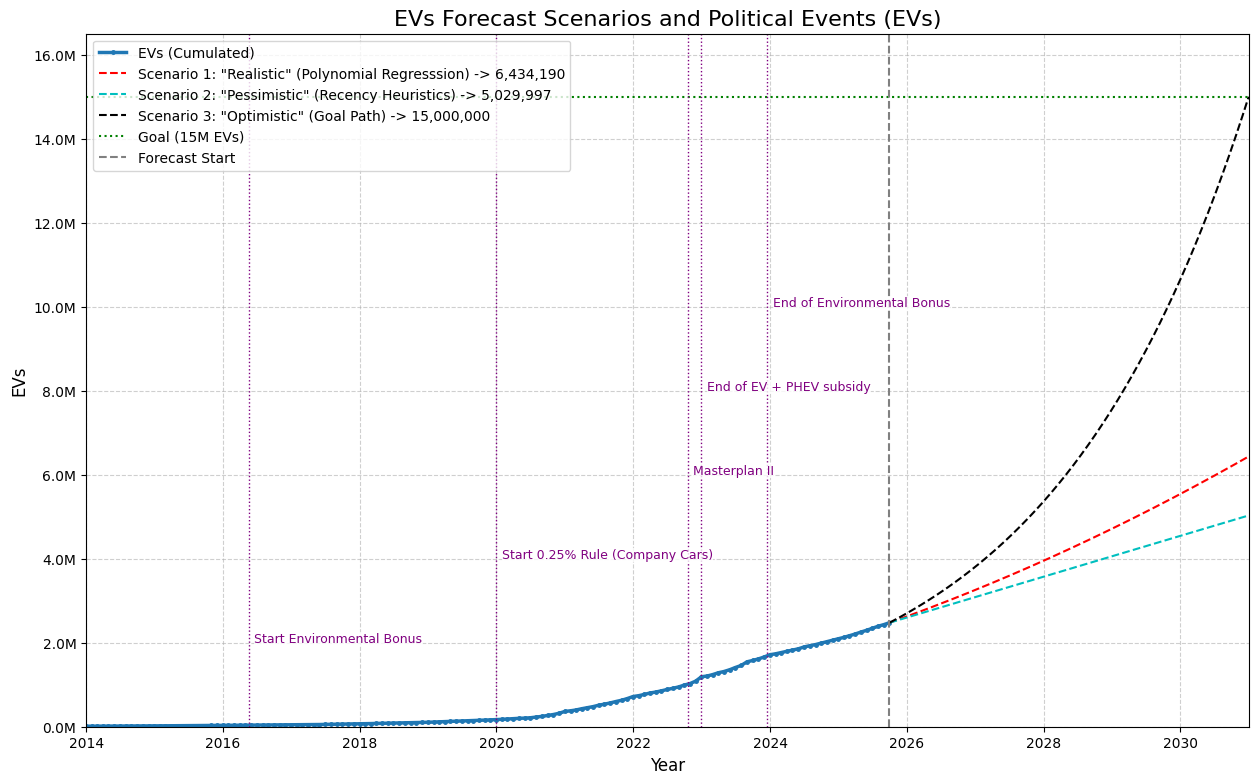

In [186]:
df_regs = pd.read_csv("datasets/ev_registrations_cleaned.csv")

df_ev = df_regs[df_regs["Type"] == "Reine Elektroautos"].copy()

df_ev["Date"] = pd.to_datetime(
    df_ev["Year"].astype(str) + "-" + df_ev["Month"].astype(str) + "-01"
) + pd.offsets.MonthEnd(0)
df_ev = df_ev.sort_values("Date")

initial_stock_date = pd.to_datetime("2013-12-31")
initial_stock_value = 12156
df_ev["Cumulative_New_Regs"] = df_ev["Count"].cumsum()
df_ev["EV_Stock"] = initial_stock_value + df_ev["Cumulative_New_Regs"]

df = df_ev[["Date", "EV_Stock"]].copy()
start_row = pd.DataFrame(
    {"Date": [initial_stock_date], "EV_Stock": [initial_stock_value]}
)
df = pd.concat([start_row, df], ignore_index=True)

start_date_model = df["Date"].min()
df["Days"] = (df["Date"] - start_date_model).dt.days

X_all = df[["Days"]]
y_all = df["EV_Stock"]

current_date = df["Date"].max()
current_points = df["EV_Stock"].max()
target_date_goal = datetime(2030, 12, 31)
target_points_goal = 15_000_000
days_to_goal = (target_date_goal - current_date).days

future_days_rel = np.arange(0, days_to_goal + 1)
future_days_abs = future_days_rel + df["Days"].max()
X_future = future_days_abs.reshape(-1, 1)
future_dates = [current_date + pd.Timedelta(days=int(d)) for d in future_days_rel]

# "Realistic" (Polynomial)
poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X_all, y_all)
y_pred_poly = poly_model.predict(X_future)
y_pred_poly_anchored = y_pred_poly - y_pred_poly[0] + current_points
prediction_poly = y_pred_poly_anchored[-1]

# "Pessimistic" (Recency Heuristic)
df_last_12m = df.tail(13)
monthly_increase = df_last_12m["EV_Stock"].diff().mean()
daily_growth_recency_strict = monthly_increase / 30.44
y_pred_recency = current_points + (daily_growth_recency_strict * future_days_rel)
prediction_recency = y_pred_recency[-1]

# "Optimistic" (Exponential Goal Path)
P_0 = current_points
P_t = target_points_goal
t = days_to_goal
if P_0 <= 0:
    P_0 = 1
r_required = np.log(P_t / P_0) / t
y_exp_required = P_0 * np.exp(r_required * future_days_rel)
t_exp_dates_required = [
    current_date + pd.Timedelta(days=int(d)) for d in future_days_rel
]


plt.figure(figsize=(15, 9))

plt.plot(
    df["Date"],
    df["EV_Stock"],
    marker=".",
    markersize=5,
    label="EVs (Cumulated)",
    linewidth=2.5,
)

plt.plot(
    future_dates,
    y_pred_poly_anchored,
    "r--",
    label=f'Scenario 1: "Realistic" (Polynomial Regresssion) -> {int(prediction_poly):,}',
)

plt.plot(
    future_dates,
    y_pred_recency,
    "c--",
    label=f'Scenario 2: "Pessimistic" (Recency Heuristics) -> {int(prediction_recency):,}',
)

plt.plot(
    t_exp_dates_required,
    y_exp_required,
    "k--",
    label=f'Scenario 3: "Optimistic" (Goal Path) -> {target_points_goal:,}',
)

plt.axhline(y=target_points_goal, color="g", linestyle=":", label="Goal (15M EVs)")

plt.title("EVs Forecast Scenarios and Political Events (EVs)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("EVs", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.axvline(x=current_date, color="grey", linestyle="--", label="Forecast Start")

events = [
    (datetime(2016, 5, 18), "Start Environmental Bonus"),
    (datetime(2020, 1, 1), "Start 0.25% Rule (Company Cars)"),
    (datetime(2022, 10, 19), "Masterplan II"),
    (datetime(2023, 12, 17), "End of Environmental Bonus"),
    (datetime(2022, 12, 31), "End of EV + PHEV subsidy"),
]
y_pos = [2000000, 4000000, 6000000, 10000000, 8000000]

for i, (date, text) in enumerate(events):
    plt.axvline(x=date, color="purple", linestyle=":", linewidth=1)
    plt.text(
        date + pd.Timedelta(days=30),
        y_pos[i],
        text,
        rotation=0,
        color="purple",
        fontsize=9,
        bbox=dict(facecolor="white", alpha=0.8, edgecolor="none", pad=0.2),
    )

plt.legend(
    loc="upper left", fontsize=10, frameon=True, facecolor="white", framealpha=0.8
)
formatter = ticker.FuncFormatter(lambda x, p: f"{x/1_000_000:.1f}M")
plt.gca().get_yaxis().set_major_formatter(formatter)
plt.xlim(left=datetime(2014, 1, 1), right=target_date_goal)
plt.ylim(bottom=0, top=target_points_goal * 1.1)

plt.show()